In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("BlackFriday (1).csv")

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [16]:
df[df["Product_Category_2"].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
537563,1004736,P00154642,M,18-25,20,A,1,1,8,NaN,NaN,6074
537565,1004736,P00051142,M,18-25,20,A,1,1,8,NaN,NaN,7934
537566,1004736,P00048742,M,18-25,20,A,1,1,5,NaN,NaN,5350
537568,1004736,P00250642,M,18-25,20,A,1,1,11,NaN,NaN,5930


In [17]:
df.corr(numeric_only=True)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


In [18]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [19]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,23961.000000


Columan analysis

In [20]:
for i in df.columns:
    print(f"Unique values in {i} are:{df[i].nunique()}\n {df[i].unique()}\n")

Unique values in User_ID are:5891
 [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique values in Product_ID are:3623
 ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']

Unique values in Gender are:2
 ['F' 'M']

Unique values in Age are:7
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique values in Occupation are:21
 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique values in City_Category are:3
 ['A' 'C' 'B']

Unique values in Stay_In_Current_City_Years are:5
 ['2' '4+' '3' '1' '0']

Unique values in Marital_Status are:2
 [0 1]

Unique values in Product_Category_1 are:18
 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]

Unique values in Purchase are:17959
 [ 8370 15200  1422 ... 14539 11120 18426]



In [ ]:
"""data_gen=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]) ,len(df[df["Gender"]=="F"])]},index=["Male","Female"])
data_gen.plot.pie(subplots=True,autopct="%.1f")"""

# Gender Analysis

<Axes: title={'center': 'Gender Distribution'}>

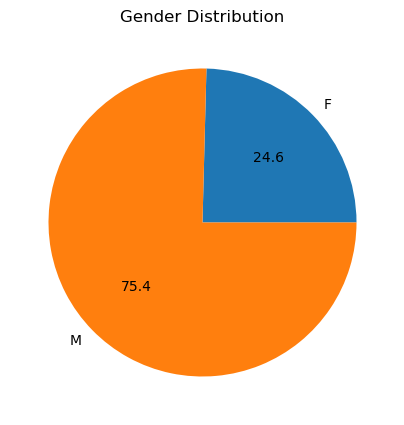

In [21]:
df.groupby(by="Gender").size().plot.pie(autopct="%.1f"
                                       ,title="Gender Distribution",
                                       figsize=(5,5))

In [22]:
df.groupby(by="Gender").size()


Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

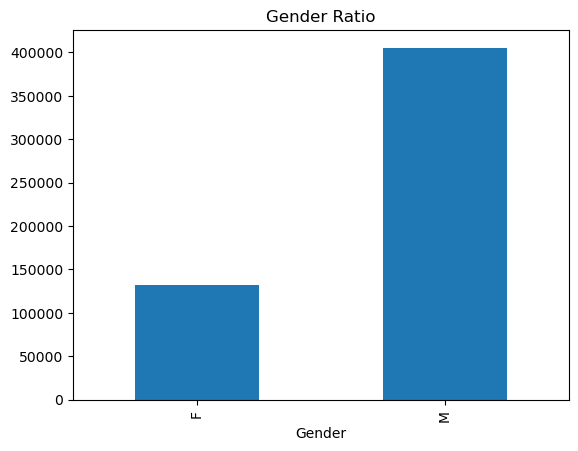

In [25]:
df.groupby(by="Gender").size().plot(kind="bar",title="Gender Ratio")

<Axes: xlabel='Gender'>

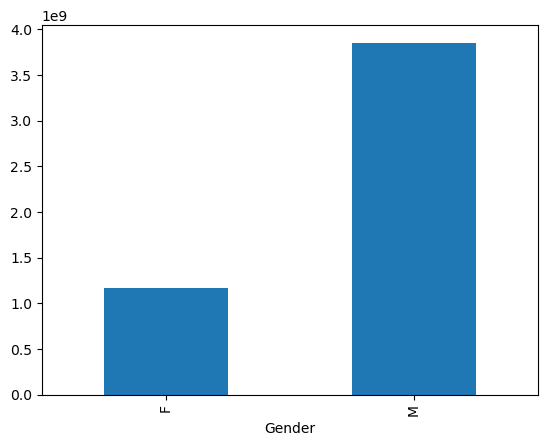

In [24]:
#Amount spend by male and female
df.groupby(by="Gender").sum()["Purchase"].plot(kind="bar")

In [ ]:
##Amount spend by male and female(RAtio)
df.groupby(by="Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

In [ ]:
#What is the avg price spend by male and female
df.groupby(by="Gender").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

<Axes: xlabel='Gender'>

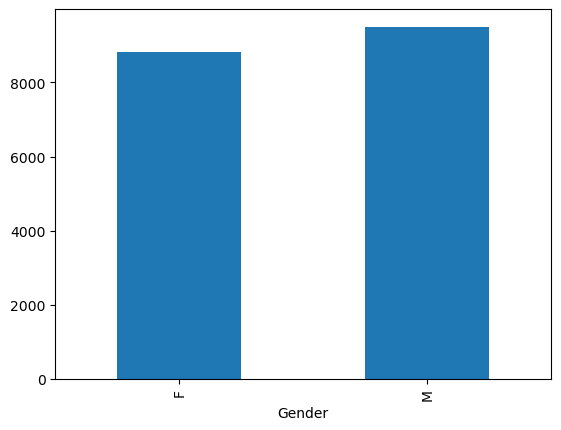

In [11]:
df.groupby("Gender").mean(numeric_only=True)["Purchase"].plot(kind="bar")

# Age And Maritial status

In [ ]:
df.groupby(by="Age").size()["Purchase"].plot(kind="bar",title="product Distribution by age")

In [ ]:
df.groupby(by="Age").sum()["Purchase"].plot.bar(title="Amount Distribution by age",figsize=(10,5))

In [ ]:
for i in df["Age"].unique():
  print(i,":",len(df[df["Age"]==i]))

In [ ]:
l=[]
for i in df["Age"].unique():
   l.append((i,df[df["Age"]==i]["Product_ID"].nunique()))
pd.DataFrame(li,columns=["Age","No Of Products"]).plot(kind="bar",x="Age",y="No Of Products")

In [ ]:
#df.groupby(by="Age").sum()["Purchase"].plot(kind="bar")

In [ ]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')


In [ ]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')


In [ ]:
df.groupby(by="Marital_Status").size().plot(kind="pie",autopct="%.1f")

# Bivariate Analysis

In [ ]:
df.sample(9)

In [ ]:
sns.set({"figure.figsize":(12,6)})
sns.countplot(data=df,hue="Gender",x="Age")

In [ ]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(df,x="Gender",hue="Age")

In [ ]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x ="Gender", hue ='Marital_Status', data = df)

In [ ]:
sns.set({"figure.figsize":(6,4)})
sns.countplot(x=df["City_Category"])

In [ ]:
df.groupby(by="City_Category").size().plot(kind="pie",autopct="%.1f")

In [ ]:
sns.countplot(df,x="City_Category",hue="Age")
sns.set({"figure.figsize":(7,6)})

In [ ]:
sns.countplot(data=df,x="Marital_Status",hue="City_Category")

In [ ]:
sns.countplot(df,x="Gender",hue="City_Category")

In [ ]:
df.groupby(by="City_Category").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

In [ ]:
df.groupby(by="City_Category").mean()["Purchase"].plot(kind="pie",autopct="%.1f")

# Occupation and product analysis

In [ ]:
df.head()

In [ ]:
sns.countplot(df,x="Stay_In_Current_City_Years")

In [ ]:
df.groupby(by="Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%.1f")

In [ ]:
sns.countplot(df,x="Stay_In_Current_City_Years",hue="Gender")

In [ ]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Age",data=df)

In [ ]:
sns.set({"figure.figsize":(7,7)})

sns.countplot(df,hue="Stay_In_Current_City_Years",x="Marital_Status")

In [ ]:
sns.set({"figure.figsize":(7,7)})
sns.countplot(df,hue="Stay_In_Current_City_Years",x="City_Category")

In [ ]:
df.groupby(by="Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar")

In [ ]:
df.groupby(by="Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar")

In [ ]:
sns.countplot(x=df["Occupation"])

In [ ]:
df.groupby(by="Occupation").size().sort_values().plot(kind="bar")

In [ ]:
df.groupby(by="Occupation").sum()["Purchase"].sort_values().plot(kind="bar")

In [ ]:
df.groupby(by="Occupation").mean()["Purchase"]

In [ ]:
sns.set({"figure.figsize":(5,3)})
sns.countplot(df,x="Occupation",hue="Gender")


AttributeError: 'numpy.int64' object has no attribute 'startswith'

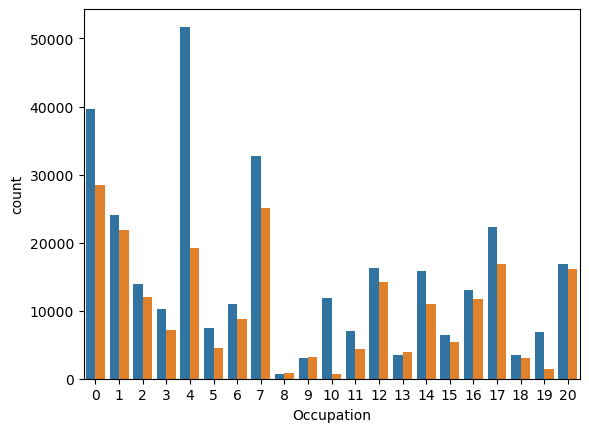

In [6]:
sns.countplot(df,x="Occupation",hue=["Marital_Status"].astype("str"))

In [ ]:
df.head()

In [ ]:
df.groupby(by="Occupation").nunique()["Product_ID"].sort_values().plot(kind="bar")

In [ ]:
df.groupby(by="Product_Category_1").size().plot(kind="bar")

In [ ]:
df.groupby(by="Product_Category_1").sum()["Purchase"].sort_values().plot(kind="bar")

In [ ]:
df.groupby(by="Product_Category_1").mean()["Purchase"].sort_values().plot(kind="bar")

In [ ]:
df.groupby(by="Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind="bar")

In [ ]:
df.groupby(by="Product_ID").size().nlargest(10).sort_values().plot(kind="bar")

In [ ]:
df.groupby(by="Product_ID").mean()[int("Purchase")].nlargest(10).sort_values().plot(kind="bar")

In [ ]:
sns.countplot(df,x="Product_Category_1",hue="Gender")

In [ ]:

sns.countplot(data=df,x="Product_Category_1",hue="Marital_Status",)

In [ ]:
li=[]
for i in range(len(df)):
    li.append(df["Gender"][i]+"_"+str(df["Marital_Status"][i]))
    

In [ ]:
df["Marital_Gender"]=li

In [ ]:
df.head()

In [ ]:
sns.countplot(df,x="Marital_Gender",hue="Age")

In [ ]:
sns.countplot(df,x="Product_Category_1",hue="Marital_Gender")
sns.set({"figure.figsize":(5,5)})

In [ ]:
sns.countplot(df,x="Stay_In_Current_City_Years",hue="Marital_Gender")


In [ ]:
sns.countplot(df,x="City_Category",hue="Marital_Gender")
